In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option ('display.max_columns', None)

In [33]:
### import our dataset
df= pd.read_csv('stats_and_contracts.csv')
df= df.drop(columns='Unnamed: 0')
df['AAV']= df['AAV'].astype('float')

In [19]:
df.head()

,Player,Season,AGE,Pos_C,Pos_LW,Pos_RW,Pos_D,Pos_G,GP,G,A,PTS,PlusMinus,ATOI,TOI(EV),PIM,PS,EV_A,PP_A,SH_A,GW,S,S_Pct,BLK,HIT,FOW,FOL,FO_Pct,CF,CA,CF_Pct,CF_Pct_rel,FF,FA,FF_Pct,FF_Pct_rel,oiSH_Pct,oiSV_Pct,PDO,oZS_Pct,dZS_Pct,TK,GV,SAtt.,Thru_Pct,SOT_Att,SOT_Scored,SOT_Saved,SOT_Pct,GS,W,L,TplusOTL,GA,SA,SV,SV_Pct,GAA,SUT,GPS,MIN,QS,RBS,TYPE,LENGTH,AAV
0,Wayne Simmonds,2021,32,0,1,1,0,0,61.666667,10.666667,10.666667,21.333333,-13.333333,14.188889,12.458333,70.000000,1.166667,6.333333,4.333333,0.000000,1.000000,112.666667,9.600000,24.000000,115.333333,13.000000,21.333333,37.566667,670.666667,716.333333,48.9,-0.533333,499.333333,519.000000,49.833333,-0.066667,6.500000,91.733333,98.233333,49.300000,50.700000,22.333333,25.000000,231.5,59.566667,0.333333,0.0,0.333333,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,2,900000.0
1,Ryan Nugent-Hopkins,2021,28,1,1,0,0,0,66.333333,22.000000,33.000000,55.000000,-5.333333,20.444444,15.041667,27.000000,5.433333,13.666667,8.000000,0.333333,3.000000,171.666667,12.733333,37.666667,42.666667,219.000000,249.000000,47.133333,893.000000,966.333333,48.6,0.500000,667.666667,718.000000,48.700000,0.366667,9.733333,90.600000,100.300000,53.900000,46.100000,45.000000,42.666667,330.5,56.833333,3.000000,1.0,2.000000,16.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,8,5125000.0
2,Trent Frederic,2021,23,1,1,0,0,0,19.666667,1.333333,0.333333,1.666667,-4.333333,9.027778,7.691667,26.666667,-0.200000,1.333333,0.000000,0.000000,1.000000,21.333333,3.033333,6.000000,29.000000,26.000000,24.333333,34.500000,150.666667,171.333333,35.2,-16.400000,113.333333,124.000000,34.366667,-19.300000,1.466667,91.233333,63.066667,49.400000,50.600000,4.666667,3.000000,12.5,79.300000,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,2,1050000.0
3,Blake Lizotte,2021,23,1,0,0,0,0,35.666667,3.000000,8.000000,11.000000,-1.000000,12.622222,11.516667,12.000000,0.700000,1.666667,0.666667,0.666667,0.000000,43.333333,4.666667,14.666667,24.666667,165.333333,162.666667,50.333333,402.000000,348.333333,56.5,10.633333,302.666667,257.666667,56.633333,11.666667,4.633333,87.766667,92.366667,45.933333,54.066667,9.666667,9.000000,80.0,53.200000,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,1,800000.0
4,Matt Nieto,2021,28,0,1,1,0,0,54.000000,5.666667,11.333333,17.000000,1.333333,13.755556,10.966667,6.000000,1.066667,4.666667,0.000000,1.000000,1.333333,72.000000,8.400000,22.666667,37.333333,5.000000,4.666667,50.000000,570.666667,568.333333,49.0,-0.800000,420.000000,414.666667,49.333333,-0.733333,8.033333,91.466667,99.500000,43.266667,56.733333,15.000000,11.000000,139.5,66.700000,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,2,850000.0


In [144]:
blah= df[df['Pos_D']==1]
rwd= blah[blah['Pos_RW']==1]
lwd=blah[blah['Pos_LW']==1]

In [145]:
rwd

,Player,Season,AGE,Pos_C,Pos_LW,Pos_RW,Pos_D,Pos_G,GP,G,A,PTS,PlusMinus,ATOI,TOI(EV),PIM,PS,EV_A,PP_A,SH_A,GW,S,S_Pct,BLK,HIT,FOW,FOL,FO_Pct,CF,CA,CF_Pct,CF_Pct_rel,FF,FA,FF_Pct,FF_Pct_rel,oiSH_Pct,oiSV_Pct,PDO,oZS_Pct,dZS_Pct,TK,GV,SAtt.,Thru_Pct,SOT_Att,SOT_Scored,SOT_Saved,SOT_Pct,GS,W,L,TplusOTL,GA,SA,SV,SV_Pct,GAA,SUT,GPS,MIN,QS,RBS,TYPE,LENGTH,AAV
151,Mark Pysyk,2020,28,0,0,1,1,0,70.000000,4.333333,10.666667,15.000000,-1.666667,16.594444,14.988889,22.000000,2.733333,4.333333,0.000000,0.0,0.333333,78.000000,6.166667,83.333333,94.000000,1.000000,1.000000,16.666667,949.666667,1062.666667,46.733333,-3.366667,734.333333,791.333333,47.533333,-3.000000,9.033333,91.200000,100.266667,40.033333,59.966667,32.000000,50.000000,146.333333,54.400000,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,1,750000.0
892,Mark Pysyk,2017,25,0,0,1,1,0,48.000000,2.333333,8.000000,10.333333,1.000000,17.550000,15.722222,14.666667,2.600000,2.333333,0.000000,0.0,0.333333,44.666667,19.000000,53.000000,36.666667,0.000000,0.333333,0.000000,639.333333,626.666667,46.166667,4.233333,489.666667,482.666667,47.000000,4.266667,9.600000,92.366667,101.966667,44.633333,55.366667,13.666667,19.666667,94.666667,44.366667,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,3,2733333.0
950,Luke Witkowski,2017,27,0,0,1,1,0,18.000000,0.000000,1.333333,1.333333,-0.333333,10.727778,10.461111,19.333333,0.266667,0.000000,0.000000,0.0,0.000000,11.666667,0.000000,14.666667,43.000000,0.000000,0.000000,0.000000,181.000000,179.333333,54.266667,4.066667,137.000000,138.666667,52.533333,2.800000,4.800000,94.766667,99.566667,53.700000,46.300000,1.666667,6.333333,25.666667,39.200000,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,2,750000.0
1380,Mark Pysyk,2015,23,0,0,1,1,0,23.333333,1.333333,3.666667,5.000000,-4.666667,18.027778,16.027778,6.000000,0.966667,1.000000,0.333333,0.0,0.666667,25.333333,18.933333,25.666667,14.666667,0.000000,0.000000,0.000000,288.666667,358.000000,42.166667,3.100000,215.333333,272.666667,42.300000,2.666667,8.266667,92.466667,100.766667,39.766667,60.233333,5.333333,10.000000,53.333333,46.000000,0.333333,0.0,0.333333,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,2,1125000.0
1991,Peter Harrold,2013,30,0,0,1,1,0,17.666667,1.000000,2.666667,3.666667,-1.666667,14.827778,13.538889,3.333333,0.733333,0.666667,0.333333,0.0,0.000000,19.666667,4.633333,9.000000,9.666667,0.000000,0.000000,0.000000,226.333333,162.000000,57.066667,0.666667,169.666667,121.333333,57.666667,1.400000,6.000000,91.100000,97.100000,58.066667,41.933333,3.666667,5.000000,38.666667,51.333333,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,2,800000.0
2216,Stu Bickel,2012,25,0,0,1,1,0,51.000000,0.000000,9.000000,9.000000,2.000000,10.433333,10.133333,108.000000,1.800000,0.000000,0.000000,0.0,0.000000,22.000000,0.000000,52.000000,68.000000,1.000000,0.000000,100.000000,412.000000,451.000000,47.700000,-3.900000,316.000000,312.000000,50.300000,-4.200000,8.300000,90.500000,98.800000,52.300000,47.700000,5.000000,8.000000,55.000000,40.000000,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,2,750000.0
2236,Peter Harrold,2012,29,0,0,1,1,0,23.000000,0.666667,2.333333,3.000000,0.333333,12.033333,11.222222,4.000000,0.700000,0.666667,0.000000,0.0,0.000000,15.333333,4.200000,10.666667,9.333333,0.666667,4.000000,4.766667,204.666667,182.000000,53.000000,-1.100000,156.000000,136.000000,53.966667,0.166667,6.833333,92.433333,99.266667,57.300000,42.700000,4.000000,3.333333,31.000000,50.733333,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,1,525000.0


In [146]:
lwd

,Player,Season,AGE,Pos_C,Pos_LW,Pos_RW,Pos_D,Pos_G,GP,G,A,PTS,PlusMinus,ATOI,TOI(EV),PIM,PS,EV_A,PP_A,SH_A,GW,S,S_Pct,BLK,HIT,FOW,FOL,FO_Pct,CF,CA,CF_Pct,CF_Pct_rel,FF,FA,FF_Pct,FF_Pct_rel,oiSH_Pct,oiSV_Pct,PDO,oZS_Pct,dZS_Pct,TK,GV,SAtt.,Thru_Pct,SOT_Att,SOT_Scored,SOT_Saved,SOT_Pct,GS,W,L,TplusOTL,GA,SA,SV,SV_Pct,GAA,SUT,GPS,MIN,QS,RBS,TYPE,LENGTH,AAV
756,Samuel Morin,2018,22,0,1,0,1,0,1.500000,0.000000,0.000000,0.000000,0.500000,16.800000,14.008333,2.000000,0.050000,0.000000,0.000000,0.0,0.000000,1.500000,0.000000,0.500000,7.000000,0.0,0.0,0.0,22.000000,15.000000,61.650000,15.400000,18.500000,10.500000,64.600000,18.750000,5.550000,95.850000,101.400000,54.400000,45.600000,1.000000,0.500000,3.500000,41.650000,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,3,700000.0
885,Yohann Auvitu,2017,27,0,1,0,1,0,25.000000,2.000000,2.000000,4.000000,1.000000,15.600000,13.516667,2.000000,1.300000,2.000000,0.000000,0.0,0.000000,54.000000,3.700000,9.000000,20.000000,0.0,0.0,0.0,293.000000,283.000000,50.900000,7.000000,227.000000,230.000000,49.700000,5.500000,6.800000,94.100000,100.900000,66.300000,33.700000,7.000000,13.000000,87.000000,62.100000,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,1,700000.0
985,Brendan Smith,2017,28,0,1,0,1,0,63.333333,3.333333,9.000000,12.333333,0.000000,18.244444,16.205556,64.333333,2.866667,2.666667,0.666667,0.0,0.666667,77.333333,4.333333,58.333333,71.000000,0.0,0.0,0.0,942.333333,792.333333,54.000000,4.000000,706.666667,618.000000,53.100000,4.033333,7.400000,91.866667,99.266667,55.966667,44.033333,13.333333,39.666667,167.333333,46.066667,0.333333,0.0,0.333333,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,4,4350000.0
1389,John Scott,2015,32,0,1,0,1,0,42.666667,1.333333,0.333333,1.666667,-4.333333,6.550000,6.461111,93.666667,-0.166667,1.333333,0.000000,0.0,0.000000,16.666667,7.366667,13.333333,75.666667,0.0,0.0,0.0,197.333333,263.000000,43.466667,-5.100000,143.333333,182.000000,45.166667,-2.700000,5.500000,93.066667,98.533333,50.533333,49.466667,6.000000,7.333333,29.000000,58.466667,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,1,575000.0
1468,Brendan Smith,2015,26,0,1,0,1,0,60.333333,3.000000,10.333333,13.333333,-1.000000,18.222222,16.577778,57.333333,2.766667,2.666667,0.333333,0.0,0.333333,70.333333,3.366667,57.333333,45.666667,0.0,0.0,0.0,909.000000,751.333333,55.066667,2.000000,683.000000,583.000000,54.400000,1.166667,6.366667,92.200000,98.566667,56.766667,43.233333,15.666667,41.000000,155.666667,43.866667,0.333333,0.0,0.333333,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,2,2750000.0
1664,John Scott,2014,31,0,1,0,1,0,41.666667,0.333333,0.333333,0.666667,-4.666667,6.300000,6.183333,82.333333,-0.200000,0.333333,0.000000,0.0,0.000000,13.333333,2.100000,12.000000,57.333333,0.0,0.0,0.0,183.333333,231.666667,45.300000,-3.333333,139.333333,165.000000,47.133333,-0.766667,5.166667,92.066667,97.166667,54.500000,45.500000,6.333333,7.000000,22.666667,58.066667,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,1,700000.0
1892,Brendan Smith,2013,24,0,1,0,1,0,24.000000,0.500000,7.000000,7.500000,2.000000,17.016667,14.883333,24.500000,1.500000,0.500000,0.000000,0.0,0.000000,23.000000,3.850000,21.500000,18.500000,0.0,0.0,0.0,356.000000,261.500000,58.650000,1.850000,273.000000,199.500000,58.950000,2.500000,6.550000,92.950000,99.500000,58.950000,41.050000,7.500000,15.500000,59.000000,39.900000,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,2,1262500.0
2026,John Scott,2013,30,0,1,0,1,0,36.333333,0.000000,0.666667,0.666667,-0.666667,6.133333,6.000000,64.666667,0.166667,0.000000,0.000000,0.0,0.000000,13.000000,0.000000,8.333333,45.666667,0.0,1.0,0.0,170.666667,176.000000,48.866667,-2.500000,130.000000,128.000000,50.300000,-0.333333,5.666667,93.200000,98.800000,58.700

In [6]:
# create goalie df

gdf= df[df['Pos_G']==1]
gdf= gdf[['Player','Season','AGE','GP','GS', 'W', 'L', 'TplusOTL', 'GA','SA','SV', 'SV_Pct', 'GAA', 'SUT', 'GPS', 'MIN', 'QS', 'RBS', 'SOT_Att', 'SOT_Scored','SOT_Saved', 'SOT_Pct', 'PTS', 'TYPE', 'LENGTH', 'AAV']]
gdf= gdf.reset_index()
gdf= gdf.drop(columns= ['index', 'TYPE'])

In [20]:
### to remove outliers, we want goalies who have played at minimum 10 games per year
### in doing this we only lose 16 data points, or 5% of our dataset
gdf= gdf[gdf['GP']>10]

In [21]:
gdf

,Player,Season,AGE,GP,GS,W,L,TplusOTL,GA,SA,SV,SV_Pct,GAA,SUT,GPS,MIN,QS,RBS,SOT_Att,SOT_Scored,SOT_Saved,SOT_Pct,PTS,LENGTH,AAV
0,Thatcher Demko,2021,25,23.666667,22.666667,11.0,10.333333,1.333333,67.333333,758.000000,690.666667,0.911000,2.906667,0.333333,4.566667,1383.333333,13.333333,3.333333,8.333333,1.333333,7.000000,83.333333,0.333333,5,5000000.0
1,Jordan Binnington,2021,27,41.333333,40.333333,24.0,10.666667,5.333333,97.666667,1145.666667,1048.000000,0.916333,2.366667,2.666667,7.233333,2424.000000,23.000000,3.666667,12.000000,3.333333,8.666667,73.633333,0.666667,6,6000000.0
2,Cory Schneider,2021,34,26.000000,23.000000,6.0,13.000000,4.000000,70.000000,718.000000,648.000000,0.903000,3.060000,1.000000,3.400000,1372.000000,10.000000,5.000000,9.000000,5.000000,4.000000,44.400000,0.000000,1,700000.0
3,Craig Anderson,2021,39,50.000000,47.000000,17.0,27.000000,4.000000,163.000000,1676.000000,1513.000000,0.903000,3.510000,2.000000,8.100000,2785.000000,19.000000,8.000000,2.000000,2.000000,0.000000,0.000000,2.000000,1,700000.0
4,Anthony Stolarz,2021,27,13.000000,9.500000,4.0,4.000000,1.500000,33.500000,366.500000,333.000000,0.913500,2.825000,1.000000,2.050000,666.500000,5.000000,1.500000,4.500000,1.500000,3.000000,75.000000,0.500000,2,950000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,Craig Anderson,2009,28,31.000000,27.000000,15.0,7.000000,5.000000,74.000000,977.000000,903.000000,0.924000,2.710000,3.000000,7.600000,1636.000000,16.000000,6.000000,11.000000,7.000000,4.000000,36.400000,1.000000,2,1812500.0
293,Peter Budaj,2009,26,56.000000,55.000000,20.0,29.000000,5.000000,154.000000,1531.000000,1377.000000,0.899000,2.860000,2.000000,7.600000,3232.000000,27.000000,14.000000,35.000000,13.000000,22.000000,62.900000,1.000000,1,1250000.0
295,Curtis McElhinney,2009,26,14.000000,5.000000,1.0,6.000000,1.000000,31.000000,280.000000,249.000000,0.889000,3.590000,0.000000,1.100000,518.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,535000.0
296,Tim Thomas,2009,34,54.000000,53.000000,36.0,11.000000,7.000000,114.000000,1694.000000,1580.000000,0.933000,2.100000,5.000000,14.700000,3259.000000,39.000000,3.000000,28.000000,9.000000,19.000000,67.900000,1.000000,4,5000000.0


In [88]:
# create player df

pdf= df[df['Pos_G'] != 1]
pdf= pdf[['Player', 'Season', 'AGE', 'Pos_C', 'Pos_LW', 'Pos_RW', 'Pos_D', 'GP', 'G', 'A', 'PTS', 'PlusMinus', 'ATOI', 
          'TOI(EV)', 'PIM', 'PS', 'EV_A','PP_A', 'SH_A', 'GW', 'S', 'S_Pct', 'BLK', 'HIT', 'FOW', 'FOL', 'FO_Pct', 'CF',
          'CA', 'CF_Pct', 'CF_Pct_rel', 'FF', 'FA', "FF_Pct", 'FF_Pct_rel', 'oiSH_Pct', 'oiSV_Pct', 'PDO', 'oZS_Pct', 
          'dZS_Pct', 'TK', 'GV', 'SAtt.', 'Thru_Pct', 'SOT_Att', 'SOT_Scored', 'SOT_Saved', 'SOT_Pct', 'TYPE',
         'LENGTH', 'AAV']]
pdf= pdf.reset_index()
pdf= pdf.drop(columns=['index', 'TYPE'])

### filter for players with more than 10 games
pdf= pdf[pdf['GP']>10]

In [89]:
pdf

,Player,Season,AGE,Pos_C,Pos_LW,Pos_RW,Pos_D,GP,G,A,PTS,PlusMinus,ATOI,TOI(EV),PIM,PS,EV_A,PP_A,SH_A,GW,S,S_Pct,BLK,HIT,FOW,FOL,FO_Pct,CF,CA,CF_Pct,CF_Pct_rel,FF,FA,FF_Pct,FF_Pct_rel,oiSH_Pct,oiSV_Pct,PDO,oZS_Pct,dZS_Pct,TK,GV,SAtt.,Thru_Pct,SOT_Att,SOT_Scored,SOT_Saved,SOT_Pct,LENGTH,AAV
0,Wayne Simmonds,2021,32,0,1,1,0,61.666667,10.666667,10.666667,21.333333,-13.333333,14.188889,12.458333,70.000000,1.166667,6.333333,4.333333,0.000000,1.000000,112.666667,9.600000,24.000000,115.333333,13.000000,21.333333,37.566667,670.666667,716.333333,48.9,-0.533333,499.333333,519.000000,49.833333,-0.066667,6.500000,91.733333,98.233333,49.300000,50.700000,22.333333,25.000000,231.5,59.566667,0.333333,0.0,0.333333,0.000000,2,900000.0
1,Ryan Nugent-Hopkins,2021,28,1,1,0,0,66.333333,22.000000,33.000000,55.000000,-5.333333,20.444444,15.041667,27.000000,5.433333,13.666667,8.000000,0.333333,3.000000,171.666667,12.733333,37.666667,42.666667,219.000000,249.000000,47.133333,893.000000,966.333333,48.6,0.500000,667.666667,718.000000,48.700000,0.366667,9.733333,90.600000,100.300000,53.900000,46.100000,45.000000,42.666667,330.5,56.833333,3.000000,1.0,2.000000,16.666667,8,5125000.0
2,Trent Frederic,2021,23,1,1,0,0,19.666667,1.333333,0.333333,1.666667,-4.333333,9.027778,7.691667,26.666667,-0.200000,1.333333,0.000000,0.000000,1.000000,21.333333,3.033333,6.000000,29.000000,26.000000,24.333333,34.500000,150.666667,171.333333,35.2,-16.400000,113.333333,124.000000,34.366667,-19.300000,1.466667,91.233333,63.066667,49.400000,50.600000,4.666667,3.000000,12.5,79.300000,0.000000,0.0,0.000000,0.000000,2,1050000.0
3,Blake Lizotte,2021,23,1,0,0,0,35.666667,3.000000,8.000000,11.000000,-1.000000,12.622222,11.516667,12.000000,0.700000,1.666667,0.666667,0.666667,0.000000,43.333333,4.666667,14.666667,24.666667,165.333333,162.666667,50.333333,402.000000,348.333333,56.5,10.633333,302.666667,257.666667,56.633333,11.666667,4.633333,87.766667,92.366667,45.933333,54.066667,9.666667,9.000000,80.0,53.200000,0.000000,0.0,0.000000,0.000000,1,800000.0
4,Matt Nieto,2021,28,0,1,1,0,54.000000,5.666667,11.333333,17.000000,1.333333,13.755556,10.966667,6.000000,1.066667,4.666667,0.000000,1.000000,1.333333,72.000000,8.400000,22.666667,37.333333,5.000000,4.666667,50.000000,570.666667,568.333333,49.0,-0.800000,420.000000,414.666667,49.333333,-0.733333,8.033333,91.466667,99.500000,43.266667,56.733333,15.000000,11.000000,139.5,66.700000,0.000000,0.0,0.000000,0.000000,2,850000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2694,Andy McDonald,2009,31,1,0,0,0,46.000000,15.000000,29.000000,44.000000,-13.000000,19.083333,14.700000,24.000000,4.400000,8.000000,6.000000,1.000000,1.000000,128.000000,11.700000,18.000000,24.000000,213.000000,154.000000,58.000000,604.000000,557.000000,52.0,4.400000,473.000000,432.000000,52.300000,4.200000,9.400000,86.500000,96.000000,46.500000,53.500000,18.000000,22.000000,216.0,59.300000,6.000000,2.0,4.000000,33.300000,4,4700000.0
2695,George Parros,2009,29,0,0,1,0,74.000000,5.000000,5.000000,10.000000,8.000000,6.266667,6.183333,135.000000,1.000000,5.000000,0.000000,0.000000,0.000000,47.000000,10.600000,14.000000,89.000000,0.000000,3.000000,0.000000,334.000000,360.000000,48.1,-7.200000,268.000000,270.000000,49.800000,-5.000000,10.000000,94.100000,104.100000,64.300000,35.700000,6.000000,13.000000,66.0,71.200000,0.000000,0.0,0.000000,0.000000,3,875000.0
2696,Henrik Zetterberg,2009,28,1,0,0,0,77.000000,31.000000,42.000000,73.000000,13.000000,19.883333,14.316667,36.000000,8.100000,17.000000,12.000000,2.000000,5.000000,309.000000,10.000000,31.000000,54.000000,624.000000,546.000000,53.300000,1241.000000,848.000000,59.4,3.100000,961.000000,690.000000,58.200000,2.400000,8.100000,90.900000,98.900000,51.500000,48.500000,42.000000,41.000000,503.0,60.400000,9.000000,3.0,6.000000,33.300000,12,6083333.0
2697,Brendan Shanahan,2009,39

## GOALIES

In [90]:
gdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 0 to 297
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      281 non-null    object 
 1   Season      281 non-null    int64  
 2   AGE         281 non-null    int64  
 3   GP          281 non-null    float64
 4   GS          281 non-null    float64
 5   W           281 non-null    float64
 6   L           281 non-null    float64
 7   TplusOTL    281 non-null    float64
 8   GA          281 non-null    float64
 9   SA          281 non-null    float64
 10  SV          281 non-null    float64
 11  SV_Pct      281 non-null    float64
 12  GAA         281 non-null    float64
 13  SUT         281 non-null    float64
 14  GPS         281 non-null    float64
 15  MIN         281 non-null    float64
 16  QS          281 non-null    float64
 17  RBS         281 non-null    float64
 18  SOT_Att     281 non-null    float64
 19  SOT_Scored  281 non-null    f

In [91]:
gdf.describe()

,Season,AGE,GP,GS,W,L,TplusOTL,GA,SA,SV,SV_Pct,GAA,SUT,GPS,MIN,QS,RBS,SOT_Att,SOT_Scored,SOT_Saved,SOT_Pct,PTS,LENGTH,AAV
count,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,2.810000e+02
mean,2014.932384,28.918149,34.922598,32.146204,16.182681,12.295077,3.821767,85.644721,986.156880,900.512159,0.912007,2.648022,2.193654,5.936892,1956.449288,17.360320,4.862396,13.386714,4.247628,9.139087,62.202046,0.717675,2.380783,2.538326e+06
std,3.468077,3.955610,13.978094,14.641669,8.403263,5.873353,1.987508,35.754279,426.725452,391.955994,0.009799,0.314765,1.794430,2.993890,835.224568,8.635474,2.527251,8.231338,2.752154,6.014785,18.178464,0.741866,1.744641,1.904610e+06
min,2009.000000,22.000000,11.000000,5.000000,1.000000,1.000000,0.000000,20.500000,280.000000,249.000000,0.873000,1.640000,0.000000,0.400000,518.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000e+05
25%,2012.000000,26.000000,23.500000,19.500000,9.666667,7.000000,2.000000,57.500000,629.666667,570.666667,0.905500,2.432500,1.000000,3.500000,1274.666667,10.500000,3.000000,7.333333,2.333333,4.666667,50.000000,0.000000,1.000000,1.050000e+06
50%,2015.000000,28.000000,33.500000,30.000000,15.000000,11.500000,3.666667,81.500000,921.000000,836.333333,0.912667,2.640000,1.666667,5.300000,1825.333333,16.000000,4.666667,12.000000,4.000000,8.000000,65.900000,0.500000,2.000000,1.850000e+06
75%,2018.000000,31.000000,45.333333,43.333333,21.333333,16.333333,5.000000,114.333333,1283.000000,1171.000000,0.917667,2.860000,3.000000,7.900000,2574.500000,23.333333,6.666667,18.000000,6.000000,12.000000,75.000000,1.000000,3.000000,3.666667e+06
max,2021.000000,42.000000,71.000000,71.000000,41.666667,31.000000,10.000000,170.333333,2059.000000,1900.000000,0.941333,3.590000,9.000000,15.600000,4088.000000,47.000000,14.000000,47.333333,13.666667,33.666667,100.000000,4.000000,12.000000,1.050000e+07


In [36]:
#gdf.isnull().sum()

Player        0
Season        0
AGE           0
GP            0
GS            0
W             0
L             0
TplusOTL      0
GA            0
SA            0
SV            0
SV_Pct        0
GAA           0
SUT           0
GPS           0
MIN           0
QS            0
RBS           0
SOT_Att       0
SOT_Scored    0
SOT_Saved     0
SOT_Pct       0
PTS           0
LENGTH        0
AAV           0
dtype: int64

In [92]:
gdf.corr()

,Season,AGE,GP,GS,W,L,TplusOTL,GA,SA,SV,SV_Pct,GAA,SUT,GPS,MIN,QS,RBS,SOT_Att,SOT_Scored,SOT_Saved,SOT_Pct,PTS,LENGTH,AAV
Season,1.000000,0.100086,-0.002343,-0.002993,-0.014035,-0.009508,0.045741,0.033274,0.027478,0.026880,0.059198,0.071417,-0.098701,-0.044165,-0.008744,-0.042373,-0.042628,-0.221334,-0.226801,-0.199123,0.163525,-0.032664,-0.060068,0.087557
AGE,0.100086,1.000000,0.232013,0.223285,0.188406,0.211300,0.215168,0.223007,0.217415,0.216359,-0.016471,0.000924,0.121028,0.185324,0.226703,0.200661,0.152043,0.056615,0.102611,0.030527,-0.031402,0.219176,-0.149687,-0.060313
GP,-0.002343,0.232013,1.000000,0.994667,0.914548,0.854979,0.731732,0.966948,0.985477,0.984692,0.151856,-0.091149,0.717329,0.927011,0.996554,0.955320,0.785568,0.674509,0.588070,0.653998,0.240863,0.512253,0.419107,0.591179
GS,-0.002993,0.223285,0.994667,1.000000,0.924561,0.848571,0.726173,0.962910,0.985324,0.984893,0.166355,-0.110686,0.720951,0.932694,0.997480,0.965619,0.785545,0.679373,0.590900,0.659359,0.235825,0.519545,0.431079,0.612300
W,-0.014035,0.188406,0.914548,0.924561,1.000000,0.606740,0.600794,0.827053,0.891634,0.895285,0.290758,-0.311623,0.785864,0.905860,0.927730,0.945987,0.644927,0.647535,0.507494,0.653952,0.275701,0.508488,0.533709,0.693825
L,-0.009508,0.211300,0.854979,0.848571,0.606740,1.000000,0.576667,0.908060,0.865488,0.859429,-0.046606,0.194564,0.451775,0.734866,0.843251,0.746820,0.778352,0.518009,0.480167,0.489197,0.148032,0.411842,0.190189,0.343411
TplusOTL,0.045741,0.215168,0.731732,0.726173,0.600794,0.576667,1.000000,0.717948,0.735002,0.734711,0.113064,-0.058086,0.506197,0.690408,0.733305,0.693298,0.547823,0.617800,0.670567,0.538642,0.115500,0.385882,0.289925,0.410113
GA,0.033274,0.223007,0.966948,0.962910,0.827053,0.908060,0.717948,1.000000,0.974732,0.969978,0.002574,0.118787,0.576570,0.856336,0.962356,0.881172,0.833103,0.621608,0.545690,0.600993,0.229919,0.502131,0.322872,0.493066
SA,0.027478,0.217415,0.985477,0.985324,0.891634,0.865488,0.735002,0.974732,1.000000,0.999792,0.184689,-0.043935,0.682072,0.948691,0.986387,0.948504,0.749765,0.662010,0.572334,0.644093,0.250926,0.512889,0.413534,0.597312
SV,0.026880,0.216359,0.984692,0.984893,0.895285,0.859429,0.734711,0.969978,0.999792,1.000000,0.200838,-0.058668,0.689982,0.954731,0.986101,0.952263,0.740279,0.664032,0.573327,0.646406,0.252212,0.512582,0.420765,0.605320


In [ ]:
### interesting how two of the seemingly most important goalie descriptive stats, SV% and GAA,
### have almost no signicant correlation with salary  ---> oddly enough points as a goalie seemed
### to have a higher correlation

In [ ]:
### plot avg aav per season to see if there is a trend of more $$

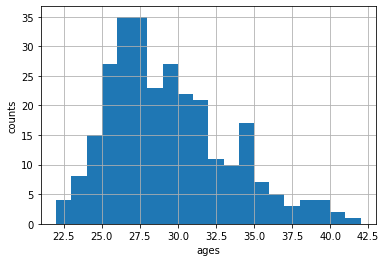

In [94]:
#plot age dist'n
age= gdf['AGE'].astype(float)
age.hist(bins=20)
plt.xlabel('ages')
plt.ylabel('counts')
plt.show()

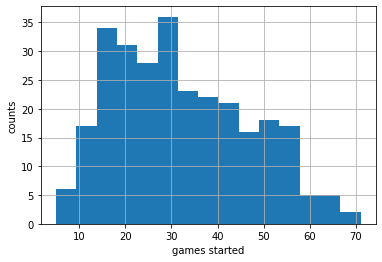

In [95]:
# dist'n of games started
gamestart= gdf['GS']
gamestart.hist(bins=15)
plt.xlabel('games started')
plt.ylabel('counts')
plt.show()

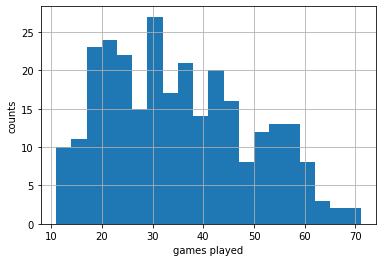

In [96]:
# games played
gamesplayed_g= gdf['GP']
gamesplayed_g.hist(bins=20)
plt.xlabel('games played')
plt.ylabel('counts')
plt.show()

In [97]:
print(  min(gdf.AAV))
print(  max(gdf.AAV))

500000.0
10500000.0


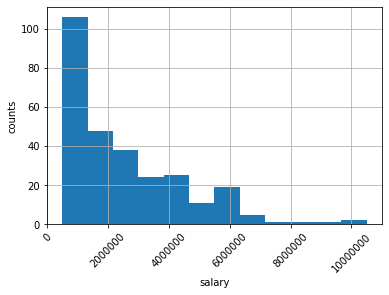

In [98]:
g_salary= gdf['AAV']
g_salary.hist(range=[500000, 10500000],bins=12, log=False)
plt.ticklabel_format(style='plain')
plt.xticks(rotation= 45)
plt.xlabel('salary')
plt.ylabel('counts')
plt.show()

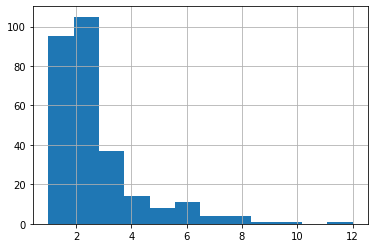

In [99]:
length= gdf['LENGTH'].astype(float)
length.hist(bins=12)
plt.show()

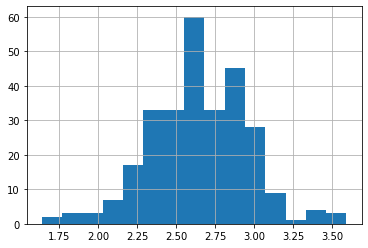

In [100]:
gaa= gdf['GAA']
gaa.hist(bins=15)
plt.show()

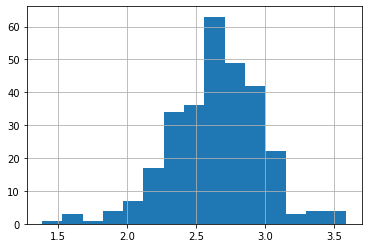

In [68]:
morethanfive.GAA.hist(bins=15)
plt.show()

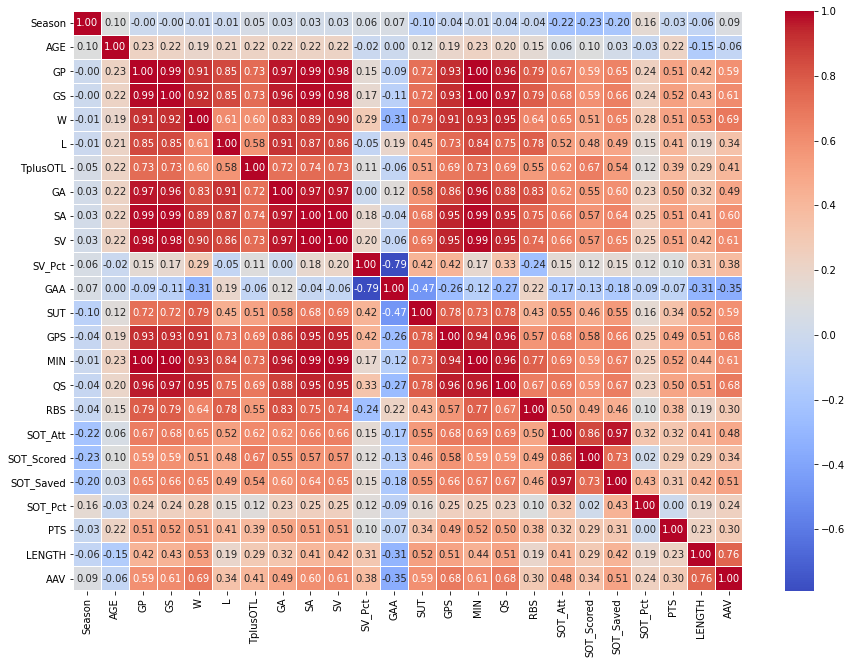

In [102]:
corrmat = gdf.corr()
f, ax = plt.subplots(figsize=(15, 10))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)

In [88]:
gdf.pivot_table(index='AGE', values=['GP','GAA',"SV_Pct",'AAV'], aggfunc=['count','mean'])

count                         mean                               
      AAV GAA  GP SV_Pct           AAV       GAA         GP    SV_Pct
AGE                                                                  
22      7   7   7      7  1.533929e+06  2.128571  18.071429  0.928214
23     11  11  11     11  1.821212e+06  2.627424  24.136364  0.916985
24     17  17  17     17  2.322059e+06  2.641765  28.862745  0.913392
25     30  30  30     30  3.153118e+06  2.634361  32.338889  0.911553
26     35  35  35     35  2.381029e+06  2.696786  31.764286  0.910760
27     39  39  39     39  1.939556e+06  2.669829  27.946581  0.911207
28     23  23  23     23  2.532833e+06  2.579348  31.347826  0.915717
29     28  28  28     28  2.966518e+06  2.591726  35.940476  0.911390
30     22  22  22     22  2.763258e+06  2.608182  35.469697  0.910765
31     22  22  22     22  2.419205e+06  2.724811  35.208333  0.907989
32     11  11  11     11  2.912879e+06  2.601061  38.484848  0.911788
33     10  10  10     10  2.037500e+06  2.747167  37.566667  0.910017
34     17  17  17     17  2.246373e+06  2.667549  39.078431  0.912422
35      7   7   7      7  2.652381e+06  2.665000  42.976190  0.913262
36      5   5   5      5  2.660000e+06  2.518333  41.650000  0.916200
37      3   3   3      3  2.583333e+06  2.746111  42.444444  0.911278
38      4   4   4      4  1.343750e+06  2.827500  41.416667  0.909167
39      4   4   4      4  1.400000e+06  2.708333  41.916667  0.915667
40      2   2   2      2  3.100000e+06  2.483333  45.000000  0.912750
42      1   1   1      1  7.000000e+05  2.315000  44.000000  0.904500

In [102]:
sns.pairplot(gdf, palette= 'Set1')

Error in callback <function flush_figures at 0x0D3CBB28> (for post_execute):


KeyboardInterrupt: 

## PLAYERS

In [ ]:
#### to analyze multiple positions get a sum of all position columns and see what percentage
#### of players play more than one posititions ----- make sure to also do a subset of that 
#### group for what percentage of players play forward and defense, specifically
#### ----> see if any correlation with salary

In [37]:
pdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2702 entries, 0 to 2701
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      2702 non-null   object 
 1   Season      2702 non-null   int64  
 2   AGE         2702 non-null   int64  
 3   Pos_C       2702 non-null   int64  
 4   Pos_LW      2702 non-null   int64  
 5   Pos_RW      2702 non-null   int64  
 6   Pos_D       2702 non-null   int64  
 7   GP          2702 non-null   float64
 8   G           2702 non-null   float64
 9   A           2702 non-null   float64
 10  PTS         2702 non-null   float64
 11  PlusMinus   2702 non-null   float64
 12  ATOI        2702 non-null   float64
 13  TOI(EV)     2699 non-null   float64
 14  PIM         2702 non-null   float64
 15  PS          2702 non-null   float64
 16  EV_A        2702 non-null   float64
 17  PP_A        2702 non-null   float64
 18  SH_A        2702 non-null   float64
 19  GW          2702 non-null  

In [38]:
pdf.describe()

,Season,AGE,Pos_C,Pos_LW,Pos_RW,Pos_D,GP,G,A,PTS,PlusMinus,ATOI,TOI(EV),PIM,PS,EV_A,PP_A,SH_A,GW,S,S_Pct,BLK,HIT,FOW,FOL,FO_Pct,CF,CA,CF_Pct,CF_Pct_rel,FF,FA,FF_Pct,FF_Pct_rel,oiSH_Pct,oiSV_Pct,PDO,oZS_Pct,dZS_Pct,TK,GV,SAtt.,Thru_Pct,SOT_Att,SOT_Scored,SOT_Saved,SOT_Pct,LENGTH,AAV
count,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2699.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2699.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2.702000e+03
mean,2014.710585,27.044041,0.289415,0.366765,0.350111,0.356773,54.676783,8.105693,13.492074,21.597767,-0.021620,15.376890,13.054309,32.571028,2.654965,6.170769,1.691155,0.245651,1.283525,89.197539,8.014341,41.609487,70.042037,82.099926,83.451949,27.448350,681.537811,677.541944,49.725006,-0.934922,508.316586,505.654885,49.752745,-0.950333,8.002665,91.712198,99.654272,50.581523,49.418977,20.499352,23.197971,164.816166,53.256674,1.162472,0.364946,0.797527,8.300268,2.466691,2.292547e+06
std,3.458950,4.147670,0.453575,0.482011,0.477093,0.479136,19.933781,7.280771,10.198743,16.404306,7.324046,3.816859,2.785424,28.211923,2.208046,5.205643,2.417772,0.501401,1.349620,55.504387,5.211874,35.230749,48.329976,159.162153,151.908867,22.205506,330.010560,314.108319,3.972158,3.959634,246.465341,235.792536,3.984854,3.991276,3.135565,2.704262,4.438825,7.277523,7.277577,13.742074,15.841712,97.804257,9.289667,2.101202,0.824204,1.384519,16.064593,1.826671,1.921194e+06
min,2009.000000,20.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-26.500000,4.016667,4.000000,0.000000,-1.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,25.000000,-28.100000,1.000000,2.000000,23.250000,-30.250000,0.000000,44.850000,48.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.750000e+05
25%,2012.000000,24.000000,0.000000,0.000000,0.000000,0.000000,42.000000,2.500000,6.000000,9.000000,-4.333333,12.718056,11.127778,14.000000,0.900000,2.000000,0.000000,0.000000,0.333333,46.666667,4.450000,17.000000,35.000000,0.000000,0.000000,0.000000,428.000000,446.000000,47.400000,-3.300000,317.750000,330.375000,47.433333,-3.225000,6.866667,90.933333,98.566667,46.654167,45.433333,9.666667,11.333333,90.000000,47.233333,0.000000,0.000000,0.000000,0.000000,1.000000,8.032500e+05
50%,2015.000000,26.000000,0.000000,0.000000,0.000000,0.000000,59.500000,6.000000,11.000000,17.000000,-0.500000,15.373611,13.072222,25.333333,2.200000,4.666667,0.666667,0.000000,1.000000,81.333333,7.533333,30.333333,59.666667,3.500000,6.166667,33.333333,687.000000,691.500000,49.866667,-0.800000,508.333333,514.333333,49.858333,-0.800000,8.000000,91.800000,99.800000,50.700000,49.300000,18.666667,20.000000,151.666667,55.033333,0.000000,0.000000,0.000000,0.000000,2.000000,1.500000e+06
75%,2018.000000,29.000000,1.000000,1.000000,1.000000,1.000000,70.333333,12.000000,19.000000,31.000000,3.666667,17.938889,14.919444,41.333333,3.950000,9.000000,2.666667,0.333333,2.000000,124.000000,10.966667,53.500000,94.333333,71.750000,89.500000,46.825000,931.250000,905.000000,52.200000,1.533333,693.916667,678.916667,52.100000,1.400000,8.966667,92.733333,100.966667,54.566667,53.345833,28.666667,32.500000,224.000000,59.466667,1.333333,0.333333,1.000000,11.100000,3.000000,3.250000e+06
max,2021.000000,45.000000,1.000000,1.000000,1.000000,1.000000,83.000000,43.500000,67.000000,94.500000,37.000000,27.333333,21.400000,230.500000,11.266667,30.000000,19.000000,5.000000,9.000000,330.500000,100.000000,237.000000,368.666667,971.6666

In [39]:
#pdf.isnull().sum()

Player        0
Season        0
AGE           0
Pos_C         0
Pos_LW        0
Pos_RW        0
Pos_D         0
GP            0
G             0
A             0
PTS           0
PlusMinus     0
ATOI          0
TOI(EV)       3
PIM           0
PS            0
EV_A          0
PP_A          0
SH_A          0
GW            0
S             0
S_Pct         0
BLK           0
HIT           0
FOW           0
FOL           0
FO_Pct        0
CF            0
CA            0
CF_Pct        0
CF_Pct_rel    0
FF            0
FA            0
FF_Pct        0
FF_Pct_rel    0
oiSH_Pct      0
oiSV_Pct      0
PDO           0
oZS_Pct       0
dZS_Pct       0
TK            0
GV            0
SAtt.         3
Thru_Pct      0
SOT_Att       0
SOT_Scored    0
SOT_Saved     0
SOT_Pct       0
LENGTH        0
AAV           0
dtype: int64

In [42]:
pdf.corr()

,Season,AGE,Pos_C,Pos_LW,Pos_RW,Pos_D,GP,G,A,PTS,PlusMinus,ATOI,TOI(EV),PIM,PS,EV_A,PP_A,SH_A,GW,S,S_Pct,BLK,HIT,FOW,FOL,FO_Pct,CF,CA,CF_Pct,CF_Pct_rel,FF,FA,FF_Pct,FF_Pct_rel,oiSH_Pct,oiSV_Pct,PDO,oZS_Pct,dZS_Pct,TK,GV,SAtt.,Thru_Pct,SOT_Att,SOT_Scored,SOT_Saved,SOT_Pct,LENGTH,AAV
Season,1.000000,-0.059188,0.062140,0.096555,0.070623,-0.004245,-0.109176,-0.064922,-0.096002,-0.088500,-0.037324,-0.058815,0.045280,-0.291509,-0.095764,-0.029618,-0.121730,-0.050145,-0.062703,-0.076941,0.006526,-0.032563,-0.047661,-0.034482,-0.024149,0.015436,-0.025435,-0.018619,-0.010593,0.132685,-0.035805,-0.029387,-0.023146,0.131689,0.012880,-0.032534,-0.015370,-0.042184,0.042189,-0.060865,0.017396,-0.067704,0.019372,-0.122501,-0.109914,-0.120480,-0.069162,-0.014417,0.055850
AGE,-0.059188,1.000000,-0.040430,-0.079010,-0.058311,0.038293,0.267693,0.088418,0.193272,0.159402,0.009810,0.196925,0.130171,0.196083,0.164691,0.059501,0.128655,0.051112,0.099039,0.162802,0.002696,0.221778,0.125498,0.105949,0.072945,0.050959,0.231404,0.251267,-0.035460,-0.105004,0.232037,0.250054,-0.036175,-0.102557,0.006426,0.030736,0.026852,-0.133256,0.133255,0.126088,0.231170,0.169619,0.022415,0.013973,0.023645,0.007130,0.006365,-0.135875,0.010058
Pos_C,0.062140,-0.040430,1.000000,0.034190,-0.061228,-0.475298,0.088234,0.211742,0.127758,0.173407,-0.057267,-0.161400,-0.243078,-0.122055,-0.052266,0.221072,0.112823,0.233314,0.192449,0.114810,0.239167,-0.229830,-0.106956,0.689262,0.709050,0.560928,-0.045210,-0.037072,-0.062684,-0.030691,-0.048025,-0.042551,-0.057160,-0.026755,0.016765,-0.019191,-0.011956,-0.132338,0.132338,0.237410,-0.079396,0.040756,0.315198,0.205804,0.193644,0.197061,0.195706,0.022364,0.040823
Pos_LW,0.096555,-0.079010,0.034190,1.000000,0.236729,-0.549160,0.054214,0.275568,0.032581,0.142562,-0.030203,-0.317007,-0.350942,0.048706,-0.058321,0.313255,0.124714,0.145240,0.203620,0.134508,0.299057,-0.382756,0.054715,-0.009530,0.001950,0.338462,-0.103328,-0.120703,0.008058,0.024458,-0.104257,-0.120171,0.008892,0.023699,0.003420,-0.002593,-0.002735,0.020089,-0.020078,0.116058,-0.155128,0.054873,0.356406,0.129219,0.085199,0.145390,0.125163,-0.023754,-0.014771
Pos_RW,0.070623,-0.058311,-0.061228,0.236729,1.000000,-0.535297,0.046720,0.269030,0.027215,0.136324,-0.071790,-0.315396,-0.347952,0.026151,-0.062206,0.297443,0.151870,0.090717,0.186653,0.156797,0.255510,-0.372992,0.031475,-0.087919,-0.073549,0.309033,-0.109631,-0.126323,0.003828,0.010473,-0.110090,-0.124155,0.006898,0.018101,0.005023,-0.024986,-0.010048,0.022064,-0.022060,0.118566,-0.157626,0.081052,0.309191,0.204992,0.173725,0.207687,0.174515,-0.016776,-0.026870
Pos_D,-0.004245,0.038293,-0.475298,-0.549160,-0.535297,1.000000,-0.110157,-0.465724,-0.118650,-0.280470,0.073062,0.525830,0.627595,-0.043033,0.112928,-0.512819,-0.243140,-0.268370,-0.377295,-0.256029,-0.484919,0.634125,0.018698,-0.371990,-0.395853,-0.738734,0.183679,0.203261,0.038325,0.030316,0.184769,0.203099,0.034239,0.023636,0.029436,0.002279,0.032193,0.061689,-0.061700,-0.280597,0.253063,-0.103952,-0.646828,-0.322958,-0.265686,-0.331971,-0.272563,0.022889,0.016847
GP,-0.109176,0.267693,0.088234,0.054214,0.046720,-0.110157,1.000000,0.591273,0.679265,0.684733,0.085366,0.439703,0.343467,0.416693,0.618743,0.596713,0.436891,0.285110,0.506271,0.753830,0.188872,0.441194,0.475499,0.307314,0.316262,0.242488,0.856192,0.870985,0.116172,0.057898,0.858252,0.871019,0.104966,0.043321,0.086034,0.035864,0.112374,-0.117626,0.117578,0.699365,0.638624,0.766058,0.183494,0.307549,0.246774,0.319845,0.229727,0.309611,0.472531
G,-0.064922,0.088418,0.211742,0.275568,0.269030,-0.465724,0.591273,1.000000,0.754681,0.913027,0.195225,0.275065,0.147435,0.132645,0.725147,0.972282,0.841342,0.369958,0.859515,0.874576,0.549784,-0.125503,0.098669,0.381924,0.401628,0.441406,0.560891,0.489542,0.267245,0.291350,0.560682,0.498670,0.234942,0.249217,0.188076,-0.074868,0.099886,0.123262,-0.123281,0.733342,0.431773,0.803092,0.363812,0.595293,0.490452,0.611475,0.444031,0.412931,0.616056
A,-0.096

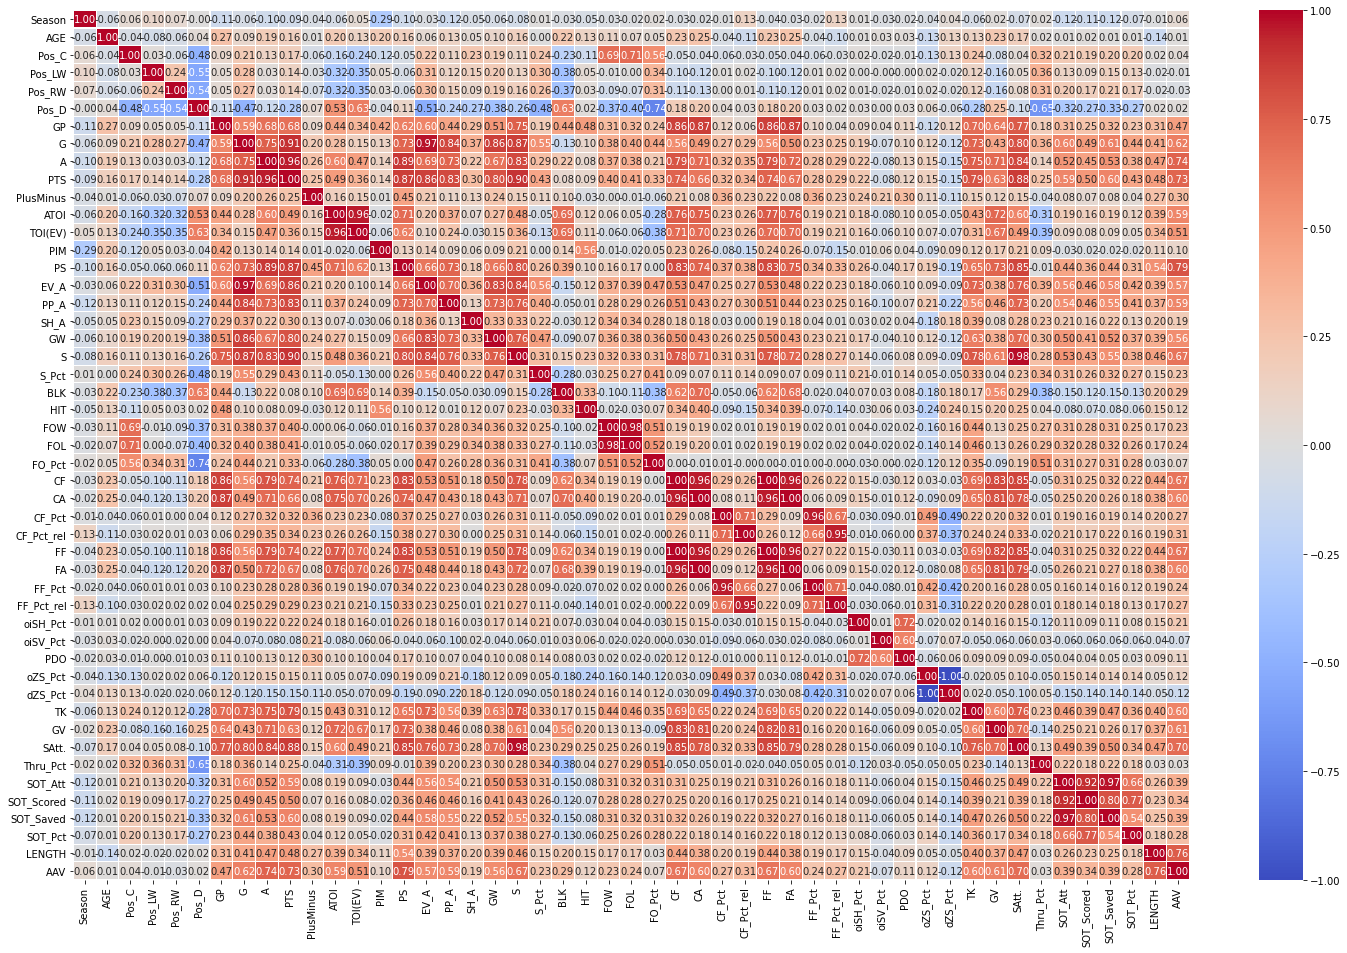

In [100]:
corrmat = pdf.corr()
f, ax = plt.subplots(figsize=(25, 15))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)

# HYPOTHESIS TESTING
### 1) do players make more than goalies
### 2) do forwards make more than defense
### 3) do forwards who play multiple positions make more than everyone else
### 4) is playing forward AND defense correlated with more money

In [ ]:
### also make a distribution of ages of all players 

In [ ]:
### want a df of 
# 1) c only
# 2) rw only
# 3) lw only
# 4) d only
# 5) g only
# 6) forwards only
# 7) players only (f and d)
# 8) c/rw
# 9) c/lw
# 10) c/rw/lw
# 11) lw/rw
# 12) rw/d
# 13) lw/d

### maybe a '2 or more' positions df ????



In [ ]:
### for hypothesis testing , get average salary of entire dataset , then test each subgroup
### against it before moving onto individual matchups

### will obviously have a lot of outliers for salary for top players, so maybe do an investigation
### where top 10 performers of each category and see where their salaries are in comparison to 
### everyone else

In [190]:
pos_v_sal= df[['Pos_C','Pos_LW','Pos_RW','Pos_D','Pos_G', 'AAV']]
pos_v_sal

,Pos_C,Pos_LW,Pos_RW,Pos_D,Pos_G,AAV
0,0,1,1,0,0,900000.0
1,1,1,0,0,0,5125000.0
2,1,1,0,0,0,1050000.0
3,1,0,0,0,0,800000.0
4,0,1,1,0,0,850000.0
...,...,...,...,...,...,...
2992,1,0,0,0,0,4700000.0
2993,0,0,1,0,0,875000.0
2994,1,0,0,0,0,6083333.0
2995,0,1,0,0,0,800000.0


In [183]:
pvs_copy= pos_v_sal

In [184]:
#giving the boolean values labels for their corresponding position
pvs_copy['Pos_C']= pvs_copy.Pos_C.replace(to_replace=1, value='C')
pvs_copy['Pos_LW']= pvs_copy.Pos_LW.replace(to_replace=1, value='LW')
pvs_copy['Pos_RW']= pvs_copy.Pos_RW.replace(to_replace=1, value='RW')
pvs_copy['Pos_D']= pvs_copy.Pos_D.replace(to_replace=1, value='D')
pvs_copy['Pos_G']= pvs_copy.Pos_G.replace(to_replace=1, value='G')


c:\users\squatch\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\squatch\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\squatch\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value 

In [185]:
pvs_copy

,Pos_C,Pos_LW,Pos_RW,Pos_D,Pos_G,AAV
0,0,LW,RW,0,0,900000.0
1,C,LW,0,0,0,5125000.0
2,C,LW,0,0,0,1050000.0
3,C,0,0,0,0,800000.0
4,0,LW,RW,0,0,850000.0
...,...,...,...,...,...,...
2992,C,0,0,0,0,4700000.0
2993,0,0,RW,0,0,875000.0
2994,C,0,0,0,0,6083333.0
2995,0,LW,0,0,0,800000.0


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xticklabels'

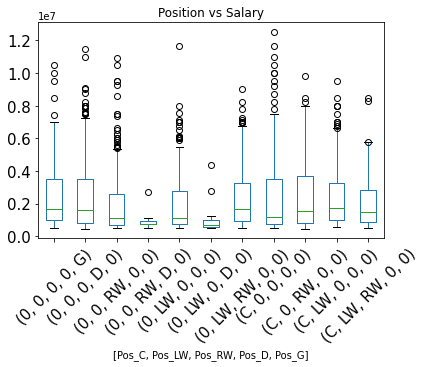

<Figure size 720x720 with 0 Axes>

In [234]:
pvs_copy.boxplot(by=['Pos_C','Pos_LW','Pos_RW','Pos_D','Pos_G'], column =['AAV'], grid=False, rot=45, fontsize=15)
plt.title('Position vs Salary')
plt.suptitle('')
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.set_xticklabels(['G','D','RW','RW/D', 'LW','LW/RW','C','C/RW', 'C/LW','C/LW/RW']) 

#set_xticks('G','D','RW','RW/D', 'LW','LW/RW','C','C/RW', 'C/LW','C/LW/RW')
# plt.set_xticklabels(('G','D','RW','RW/D', 'LW','LW/RW','C','C/RW', 'C/LW','C/LW/RW'))
# plt.tight_layout()

##sns.boxplot(x=['Pos_C','Pos_LW','Pos_RW','Pos_D','Pos_G'], y="AAV", data=pos_v_sal)

In [191]:
# Goalies only

g_sal= pos_v_sal[pos_v_sal['Pos_G']==1]
g_sal= g_sal[['Pos_G','AAV']]

In [192]:
g_sal

,Pos_G,AAV
23,1,5000000.0
26,1,6000000.0
29,1,700000.0
31,1,700000.0
41,1,950000.0
...,...,...
2957,1,1250000.0
2959,1,826875.0
2972,1,535000.0
2983,1,5000000.0


In [193]:
print ('The Averge Annual salary for a G is $%s' % round(g_sal.AAV.mean(),2))

The Averge Annual salary for a G is $2440424.62


In [194]:
# Players only

plrs= pos_v_sal[pos_v_sal['Pos_G']==0]
plrs= plrs.drop(columns='Pos_G')

In [195]:
plrs
#### get the mean of these salaries to test Players vs Goalie salaries to see which is higher

### permutation test somehwere in one of these hypothesis tests?

,Pos_C,Pos_LW,Pos_RW,Pos_D,AAV
0,0,1,1,0,900000.0
1,1,1,0,0,5125000.0
2,1,1,0,0,1050000.0
3,1,0,0,0,800000.0
4,0,1,1,0,850000.0
...,...,...,...,...,...
2992,1,0,0,0,4700000.0
2993,0,0,1,0,875000.0
2994,1,0,0,0,6083333.0
2995,0,1,0,0,800000.0


In [196]:
print ('The Averge Annual salary for a Non-Goalie Player is $%s' % round(plrs.AAV.mean(),2))

The Averge Annual salary for a Non-Goalie Player is $2291654.42


In [212]:
# Center only


c_only = pos_v_sal[pos_v_sal['Pos_C']==1]
c_only= c_only[c_only['Pos_RW']==0]
c_only= c_only[c_only['Pos_LW']==0]
c_only= c_only[c_only['Pos_D']==0]
c_only = c_only.drop(columns=['Pos_LW','Pos_RW','Pos_D','Pos_G'])
c_only

,Pos_C,AAV
3,1,800000.0
16,1,3250000.0
38,1,7000000.0
47,1,5000000.0
55,1,4800000.0
...,...,...
2976,1,1450000.0
2986,1,812500.0
2989,1,4500000.0
2992,1,4700000.0


In [213]:
print ('The Averge Annual salary for a (pure) C is $%s' % round(c_only.AAV.mean(),2))

The Averge Annual salary for a (pure) C is $2408694.73


In [216]:
# RW only

rw_only = pos_v_sal[pos_v_sal['Pos_RW']==1]
rw_only= rw_only[rw_only['Pos_C']==0]
rw_only= rw_only[rw_only['Pos_LW']==0]
rw_only= rw_only[rw_only['Pos_D']==0]
rw_only = rw_only.drop(columns=['Pos_LW','Pos_C','Pos_D','Pos_G'])
rw_only

,Pos_RW,AAV
30,1,750000.0
52,1,750000.0
114,1,6500000.0
136,1,2000000.0
188,1,1750000.0
...,...,...
2977,1,1633333.0
2978,1,2000000.0
2981,1,1300000.0
2985,1,550000.0


In [217]:
print ('The Averge Annual salary for a (pure) RW is $%s' % round(rw_only.AAV.mean(),2))

The Averge Annual salary for a (pure) RW is $2008639.48


In [218]:
# LW only

lw_only = pos_v_sal[pos_v_sal['Pos_LW']==1]
lw_only= lw_only[lw_only['Pos_C']==0]
lw_only= lw_only[lw_only['Pos_RW']==0]
lw_only= lw_only[lw_only['Pos_D']==0]
lw_only = lw_only.drop(columns=['Pos_RW','Pos_C','Pos_D','Pos_G'])
lw_only

,Pos_LW,AAV
21,1,3250000.0
70,1,3675000.0
129,1,8000000.0
132,1,1000000.0
246,1,1700000.0
...,...,...
2932,1,750000.0
2945,1,2900000.0
2961,1,800000.0
2969,1,2150000.0


In [219]:
print ('The Averge Annual salary for a (pure) LW is $%s' % round(lw_only.AAV.mean(),2))

The Averge Annual salary for a (pure) LW is $2037910.52


In [208]:
# Forwards only

fwd_only= pos_v_sal[pos_v_sal['Pos_G']==0]
fwd_only= fwd_only[fwd_only['Pos_D']==0]
fwd_only= fwd_only.drop(columns=['Pos_D','Pos_G'])
fwd_only

,Pos_C,Pos_LW,Pos_RW,AAV
0,0,1,1,900000.0
1,1,1,0,5125000.0
2,1,1,0,1050000.0
3,1,0,0,800000.0
4,0,1,1,850000.0
...,...,...,...,...
2992,1,0,0,4700000.0
2993,0,0,1,875000.0
2994,1,0,0,6083333.0
2995,0,1,0,800000.0


In [209]:
print ('The Averge Annual salary for a Forward is $%s' % round(fwd_only.AAV.mean(),2))

The Averge Annual salary for a Forward is $2269465.49


In [220]:
# Pure D only

dman= pos_v_sal[pos_v_sal['Pos_D']==1]
dman= dman[dman['Pos_RW']==0]
dman=dman[dman['Pos_LW']==0]
dman= dman[dman["Pos_C"]==0]

In [221]:
dman

,Pos_C,Pos_LW,Pos_RW,Pos_D,Pos_G,AAV
10,0,0,0,1,0,2500000.0
12,0,0,0,1,0,3000000.0
13,0,0,0,1,0,1350000.0
15,0,0,0,1,0,1350000.0
24,0,0,0,1,0,3150000.0
...,...,...,...,...,...,...
2968,0,0,0,1,0,1833333.0
2973,0,0,0,1,0,612500.0
2982,0,0,0,1,0,2000000.0
2984,0,0,0,1,0,475000.0


In [222]:
print ('The Averge Annual salary for a (pure) D is $%s' % round(dman.AAV.mean(),2))

The Averge Annual salary for a (pure) D is $2354110.6


In [223]:
# C/LW/RW only

crwlw= pos_v_sal[pos_v_sal['Pos_C']==1]
crwlw= crwlw[crwlw['Pos_RW']==1]
crwlw= crwlw[crwlw['Pos_LW']==1]
crwlw= crwlw[crwlw['Pos_D']==0]
crwlw = crwlw.drop(columns=['Pos_D','Pos_G'])
crwlw

,Pos_C,Pos_LW,Pos_RW,AAV
9,1,1,1,850000.0
51,1,1,1,1200000.0
56,1,1,1,737500.0
78,1,1,1,975000.0
84,1,1,1,1050000.0
...,...,...,...,...
2609,1,1,1,912500.0
2641,1,1,1,1200000.0
2688,1,1,1,500000.0
2720,1,1,1,750000.0


In [224]:
print ('The Averge Annual salary for a C/RW/LW is $%s' % round(crwlw.AAV.mean(),2))

The Averge Annual salary for a C/RW/LW is $2113431.45


In [156]:
# RW/D

rw_dman= pos_v_sal[pos_v_sal['Pos_D']==1]
rw_dman= rw_dman[rw_dman['Pos_RW']==1]
rw_dman= rw_dman[rw_dman['Pos_LW']==0]
rw_dman= rw_dman.drop(columns=['Pos_C', 'Pos_LW', 'Pos_G'])

In [157]:
rw_dman

,Pos_RW,Pos_D,AAV
151,1,1,750000.0
892,1,1,2733333.0
950,1,1,750000.0
1380,1,1,1125000.0
1991,1,1,800000.0
2216,1,1,750000.0
2236,1,1,525000.0


In [158]:
print ('The Averge Annual salary for a RW/D is $%s' % round(rw_dman.AAV.mean(),2))

The Averge Annual salary for a RW/D is $1061904.71


In [160]:
# LW/D

lw_dman= pos_v_sal[pos_v_sal['Pos_D']==1]
lw_dman= lw_dman[lw_dman['Pos_RW']==0]
lw_dman= lw_dman[lw_dman['Pos_LW']==1]
lw_dman= lw_dman.drop(columns=['Pos_C','Pos_RW','Pos_G'])

In [161]:
lw_dman

,Pos_LW,Pos_D,AAV
756,1,1,700000.0
885,1,1,700000.0
985,1,1,4350000.0
1389,1,1,575000.0
1468,1,1,2750000.0
1664,1,1,700000.0
1892,1,1,1262500.0
2026,1,1,750000.0
2221,1,1,600000.0
2721,1,1,512500.0


In [163]:
print ('The Averge Annual salary for a LW/D is $%s' % round(lw_dman.AAV.mean(),2))

The Averge Annual salary for a LW/D is $1218181.82


In [225]:
# C/RW

crw= pos_v_sal[pos_v_sal['Pos_C']==1]
crw= crw[crw['Pos_RW']==1]
crw= crw[crw['Pos_LW']==0]
crw= crw[crw['Pos_D']==0]
crw = crw.drop(columns=['Pos_D','Pos_G'])
crw

,Pos_C,Pos_LW,Pos_RW,AAV
6,1,0,1,1050000.0
7,1,0,1,750000.0
8,1,0,1,825000.0
14,1,0,1,1700000.0
27,1,0,1,1838362.0
...,...,...,...,...
2807,1,0,1,1000000.0
2866,1,0,1,771750.0
2873,1,0,1,500000.0
2909,1,0,1,2900000.0


In [229]:
print ('The Averge Annual salary for a C/RW is $%s' % round(crw.AAV.mean(),2))

The Averge Annual salary for a C/RW is $2469973.91


In [226]:
# C/LW

clw= pos_v_sal[pos_v_sal['Pos_C']==1]
clw= clw[clw['Pos_RW']==0]
clw= clw[clw['Pos_LW']==1]
clw= clw[clw['Pos_D']==0]
clw = clw.drop(columns=['Pos_D','Pos_G'])
clw

,Pos_C,Pos_LW,Pos_RW,AAV
1,1,1,0,5125000.0
2,1,1,0,1050000.0
18,1,1,0,3000000.0
19,1,1,0,4000000.0
39,1,1,0,700000.0
...,...,...,...,...
2811,1,1,0,3750000.0
2817,1,1,0,3200000.0
2927,1,1,0,6000000.0
2950,1,1,0,1100000.0


In [230]:
print ('The Averge Annual salary for a C/LW is $%s' % round(clw.AAV.mean(),2))

The Averge Annual salary for a C/LW is $2485619.82


In [228]:
# RW/LW

rwlw= pos_v_sal[pos_v_sal['Pos_C']==0]
rwlw= rwlw[rwlw['Pos_RW']==1]
rwlw= rwlw[rwlw['Pos_LW']==1]
rwlw= rwlw[rwlw['Pos_D']==0]
rwlw = rwlw.drop(columns=['Pos_D','Pos_G'])
rwlw

,Pos_C,Pos_LW,Pos_RW,AAV
0,0,1,1,900000.0
4,0,1,1,850000.0
5,0,1,1,1000000.0
11,0,1,1,1000000.0
17,0,1,1,1500000.0
...,...,...,...,...
2910,0,1,1,660000.0
2960,0,1,1,1700000.0
2967,0,1,1,1033333.0
2980,0,1,1,3954545.0


In [231]:
print ('The Averge Annual salary for a RW/LW is $%s' % round(rwlw.AAV.mean(),2))

The Averge Annual salary for a RW/LW is $2313640.77
